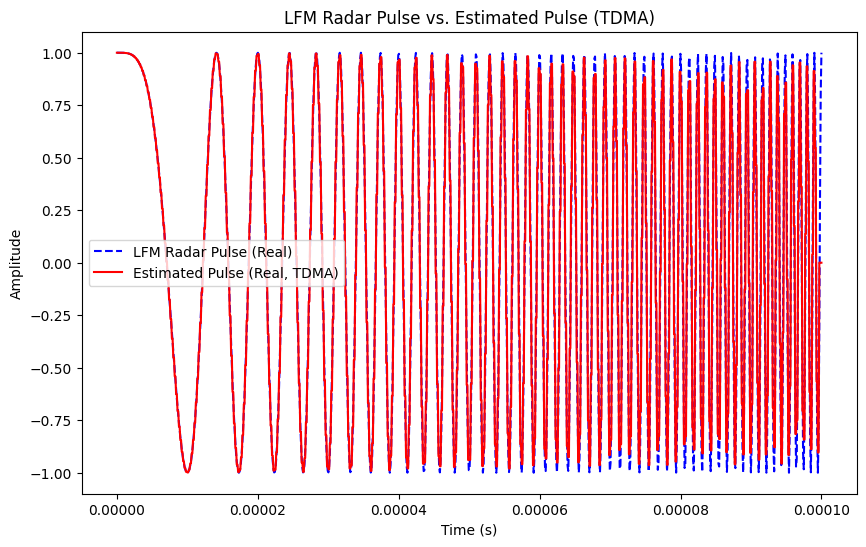

Optimized c_kl coefficients:
 [[ 1.80763060e+00  9.99735082e-01  9.94176353e-01  9.67431163e-01
   8.93006763e-01  7.38020048e-01  4.73572234e-01  9.34934286e-02
  -3.60652271e-01 -7.79772685e-01 -9.95708769e-01 -8.44489978e-01
  -2.87637312e-01  4.66322082e-01  9.69275505e-01  7.89931430e-01
  -5.41969197e-02 -8.82430782e-01 -8.21106507e-01  1.88183272e-01
   9.84835428e-01  4.36294223e-01 -7.76251483e-01 -7.44618381e-01
   5.85228456e-01  8.28721905e-01 -5.74727329e-01 -7.60348086e-01
   7.50913620e-01  4.79982075e-01 -9.70296049e-01  1.13298219e-01
   8.64935619e-01 -8.27658562e-01 -5.86878677e-02  8.56239397e-01
  -9.21537601e-01  3.26015836e-01  4.36973745e-01 -9.18778528e-01
   9.54520523e-01 -6.33778209e-01  1.53020944e-01  3.12041379e-01
  -6.62539901e-01  8.74185997e-01 -9.69443804e-01  9.88921200e-01
  -9.72371892e-01  9.49867397e-01 -9.39393369e-01  9.47186096e-01
  -9.68110859e-01  9.85396914e-01 -9.70271997e-01  8.83979501e-01
  -6.85786240e-01  3.50762041e-01  1.02644673e

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Radar waveform (LFM)
def radar_waveform(t):
    B = 1e6  # Bandwidth
    T = 1e-4  # Pulse duration
    return np.exp(1j * np.pi * B / T * t**2)  # LFM waveform

# Communication waveform (TDMA)
def comm_signal_tdma(t, k, l, K, L, Tb):
    return ((t >= (l + (k - 1) / K) * Tb) & (t < (l + k / K) * Tb)).astype(float)

# Compute the estimated radar signal with current c_kl coefficients
def estimate_radar_signal(c_kl, comm_signals, K, L):
    c_kl = c_kl.reshape((K, L))  # Reshape to a K x L matrix
    estimated_signal = np.sum([c_kl[k, l] * comm_signals[k, l] for k in range(K) for l in range(L)], axis=0)
    return estimated_signal

# Compute Mean Squared Error (MSE) between the actual radar pulse and the estimated signal
def mse_objective(c_kl, radar_pulse, comm_signals, K, L):
    estimated_signal = estimate_radar_signal(c_kl, comm_signals, K, L)
    return np.mean(np.abs(radar_pulse - estimated_signal)**2)

# Example scenario
def main():
    K = 5  # Number of communication signals
    L = 100  # Number of time slots
    T = 1e-4  # Pulse duration
    Tb = T / L  # Duration of each time slot

    # Time array for plotting and integration
    t = np.linspace(0, T, 1000)

    # Radar waveform
    radar_pulse = radar_waveform(t)

    # Generate communication signals (TDMA for simplicity)
    comm_signals = np.array([[comm_signal_tdma(t, k, l, K, L, Tb) for l in range(L)] for k in range(K)])

    # Initialize c_kl coefficients with random values
    c_kl_initial = np.random.randn(K * L)

    # Optimize c_kl to minimize the MSE between the radar pulse and the estimated signal
    result = minimize(mse_objective, c_kl_initial, args=(radar_pulse, comm_signals, K, L), method='BFGS')

    # Retrieve the optimized c_kl
    c_kl_opt = result.x.reshape((K, L))

    # Estimate the radar signal using optimized c_kl coefficients
    estimated_signal = estimate_radar_signal(c_kl_opt, comm_signals, K, L)

    # Compute final MSE between actual radar pulse and estimated radar signal
    final_mse = mse_objective(c_kl_opt, radar_pulse, comm_signals, K, L)

    # Plot the LFM radar pulse and the estimated signal
    plt.figure(figsize=(10, 6))

    # Plot LFM radar pulse (real part)
    plt.plot(t, radar_pulse.real, label="LFM Radar Pulse (Real)", linestyle='--', color='blue')

    # Plot estimated signal (real part)
    plt.plot(t, estimated_signal.real, label="Estimated Pulse (Real, TDMA)", linestyle='-', color='red')

    # Add labels and legend
    plt.title("LFM Radar Pulse vs. Estimated Pulse (TDMA)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()

    # Show plot
    plt.show()

    # Display results
    print("Optimized c_kl coefficients:\n", c_kl_opt)
    print("Final Mean Squared Error (MSE) between radar pulse and estimated signal:", final_mse)

if __name__ == "__main__":
    main()

